In [1]:
import numpy as np
import pandas as pd 
from scipy import optimize
from matplotlib import pyplot as plt

# Simple analysis

In [2]:
df = pd.read_csv('lab-results/lab_cubical_tessellation_on_torus2d_aggregated.csv')
df

Size  1st 0-dim birth mean  1st 0-dim birth var  1st 0-dim birth min   
0       3              0.099055         8.487483e-03         7.841459e-05  \
1       4              0.070395         4.369838e-03         1.384207e-04   
2       5              0.041861         1.798420e-03         5.096252e-06   
3       6              0.028286         6.635674e-04         7.045728e-04   
4       7              0.021743         4.136868e-04         6.677548e-05   
..    ...                   ...                  ...                  ...   
342   345              0.000010         7.783258e-11         7.971318e-08   
343   346              0.000009         7.412385e-11         8.030394e-08   
344   347              0.000008         4.604454e-11         2.754469e-08   
345   348              0.000008         6.515567e-11         4.661230e-08   
346   349              0.000008         5.916257e-11         3.564956e-08   

     1st 0-dim birth max  1st 1-dim birth mean  1st 1-dim birth var   
0               0.505972              0.338664             0.021806  \
1               0.339612              0.370364             0.019360   
2               0.254909              0.357405             0.011792   
3               0.120478              0.368644             0.008201   
4               0.092210              0.366056             0.010286   
..                   ...                   ...                  ...   
342             0.000034              0.403833             0.000026   
343             0.000044              0.404730             0.000026   
344             0.000046              0.405209             0.000028   
345             0.000044              0.405239             0.000039   
346             0.000034              0.405662             0.000028   

     1st 1-dim birth min  1st 1-dim birth max  2nd 1-dim birth mean   
0               0.060662             0.732840              0.477405  \
1               0.066273             0.711098              0.497418   
2               0.086843             0.609563              0.471366   
3               0.192362             0.627582              0.463836   
4               0.139963             0.654681              0.462728   
..                   ...                  ...                   ...   
342             0.389510             0.415044              0.410468   
343             0.388283             0.419623              0.409843   
344             0.392276             0.418507              0.410145   
345             0.388782             0.420663              0.410462   
346             0.391787             0.421015              0.410665   

     2nd 1-dim birth var  2nd 1-dim birth min  2nd 1-dim birth max  
0               0.028259             0.124742             0.980347  
1               0.017881             0.080392             0.799720  
2               0.013770             0.215179             0.786868  
3               0.008633             0.241009             0.697476  
4               0.009303             0.190404             0.719375  
..                   ...                  ...                  ...  
342             0.000029             0.398605             0.426939  
343             0.000024             0.398834             0.422139  
344             0.000027             0.397975             0.428488  
345             0.000037             0.395729             0.424483  
346             0.000027             0.399630             0.429763  

[347 rows x 13 columns]

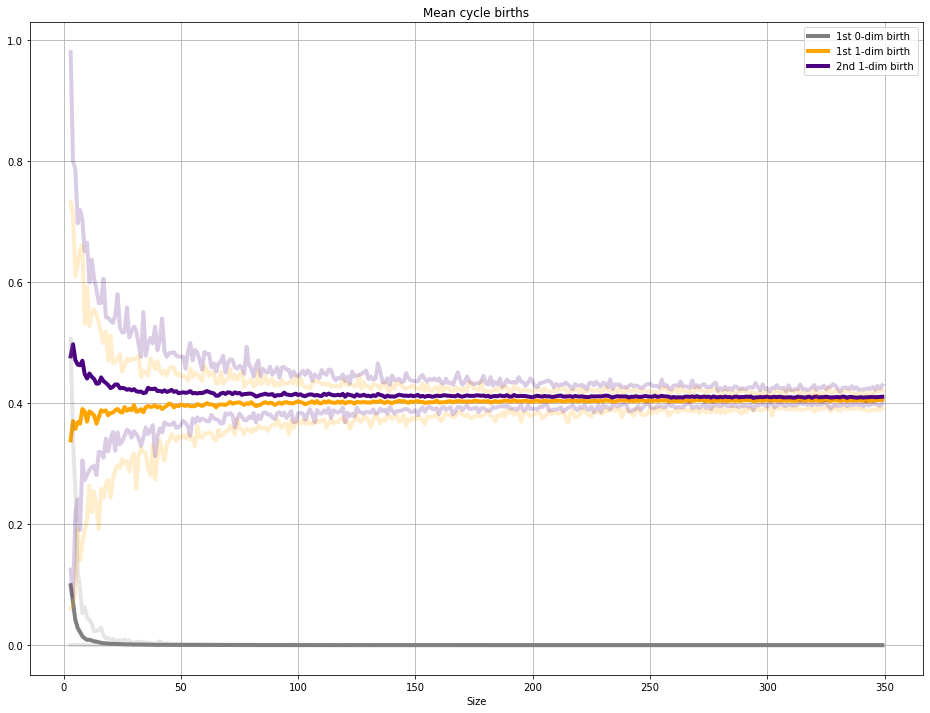

In [3]:
plt.figure(figsize=(16, 12))
plt.title('Mean cycle births')
plt.plot(df['Size'].values, df['1st 0-dim birth mean'].values, color='grey', linewidth=4, label='1st 0-dim birth')
plt.plot(df['Size'].values, df['1st 1-dim birth mean'].values, color='orange', linewidth=4, label='1st 1-dim birth')
plt.plot(df['Size'].values, df['2nd 1-dim birth mean'].values, color='indigo', linewidth=4, label='2nd 1-dim birth')

plt.plot(df['Size'].values, df['1st 0-dim birth min'].values, color='grey', linewidth=4, alpha=0.2)
plt.plot(df['Size'].values, df['1st 1-dim birth min'].values, color='orange', linewidth=4, alpha=0.2)
plt.plot(df['Size'].values, df['2nd 1-dim birth min'].values, color='indigo', linewidth=4, alpha=0.2)
plt.plot(df['Size'].values, df['1st 0-dim birth max'].values, color='grey', linewidth=4, alpha=0.2)
plt.plot(df['Size'].values, df['1st 1-dim birth max'].values, color='orange', linewidth=4, alpha=0.2)
plt.plot(df['Size'].values, df['2nd 1-dim birth max'].values, color='indigo', linewidth=4, alpha=0.2)

plt.xlabel('Size')
plt.grid(True)
plt.legend()
plt.show()

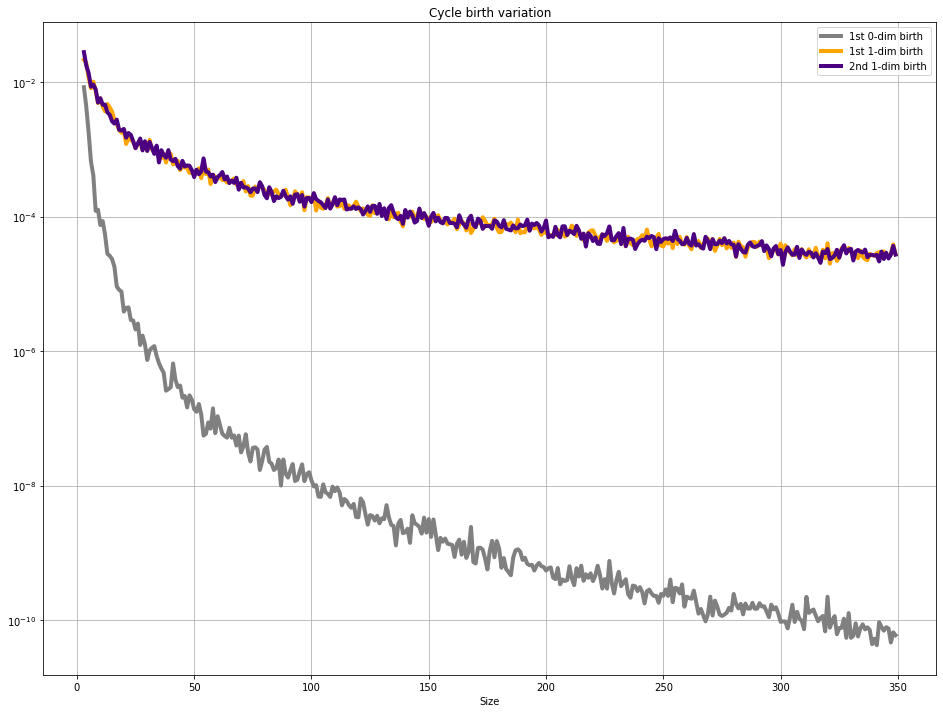

In [4]:
plt.figure(figsize=(16, 12))
plt.title('Cycle birth variation')

plt.plot(df['Size'].values, np.log(df['1st 0-dim birth var'].values)/np.log(10), color='grey', linewidth=4, label='1st 0-dim birth')
plt.plot(df['Size'].values, np.log(df['1st 1-dim birth var'].values)/np.log(10), color='orange', linewidth=4, label='1st 1-dim birth')
plt.plot(df['Size'].values, np.log(df['2nd 1-dim birth var'].values)/np.log(10), color='indigo', linewidth=4, label='2nd 1-dim birth')

yticks_pow = -np.arange(2, 11, 2)
yticks_labels = np.char.add(np.char.add('$10^{', yticks_pow.astype(str)), '}$')

plt.xlabel('Size')
plt.yticks(yticks_pow, yticks_labels)
plt.grid(True)
plt.legend()
plt.show()

# Approximation model

Assumption:
$$
    \text{var}\left(X_n\right) \approx ae^{-bn}
$$

So let call $\text{var} X_i$ $v_i$
$$
    E = \sum\limits_{i=1}^n \left(v_i - ae^{-bn_i}\right)^2 \to 0
$$


In [5]:
def error0(a, b, v, n):
    return ((v - a*np.exp(-b*n))**2).mean()

In [6]:
def get_ab0(v, n, a0=1, b0=1):
    err = lambda x: error0(x[0], x[1], v, n)
    opt = optimize.minimize(err, np.array([a0, b0]))
    return {'a': opt.x[0], 'b': opt.x[1], 'MSE': opt.fun}

a : 2.054395084702432
b : 0.10341156408818765
MSE : 0.0024427843004748706


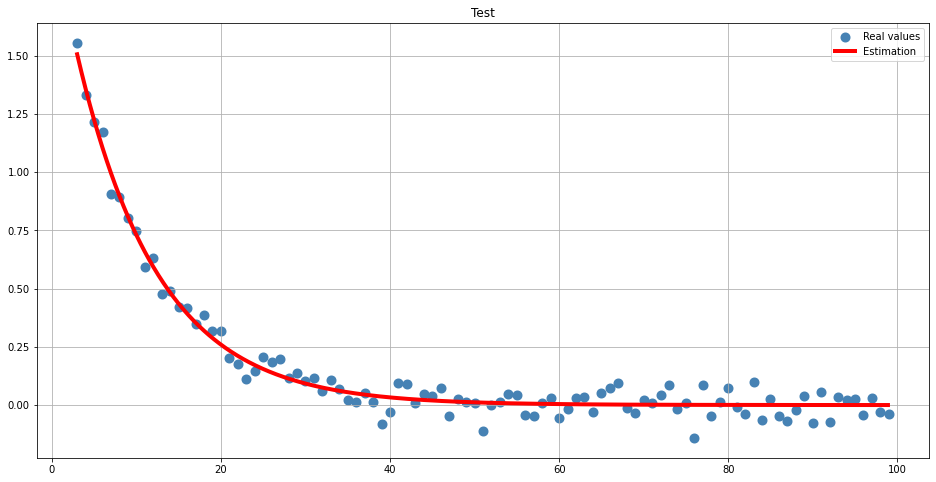

In [14]:
test_n = np.arange(3, 100)
test_v = 2 * np.exp(-0.1*test_n) + 0.05*np.random.normal(size=len(test_n))

res = get_ab0(test_v, test_n)
for key in res:
    print(key, ':', res[key])
a, b = res['a'], res['b']

estimation_x = np.arange(test_n.min(), test_n.max(), 0.1)
estimation_y = a * np.exp(-b*estimation_x)

plt.figure(figsize=(16, 8))
plt.title('Test')
plt.scatter(test_n, test_v, color='steelblue', linewidth=4, label='Real values')
plt.plot(estimation_x, estimation_y, color='red', linewidth=4, label='Estimation')
plt.grid(True)
plt.legend()
plt.show()

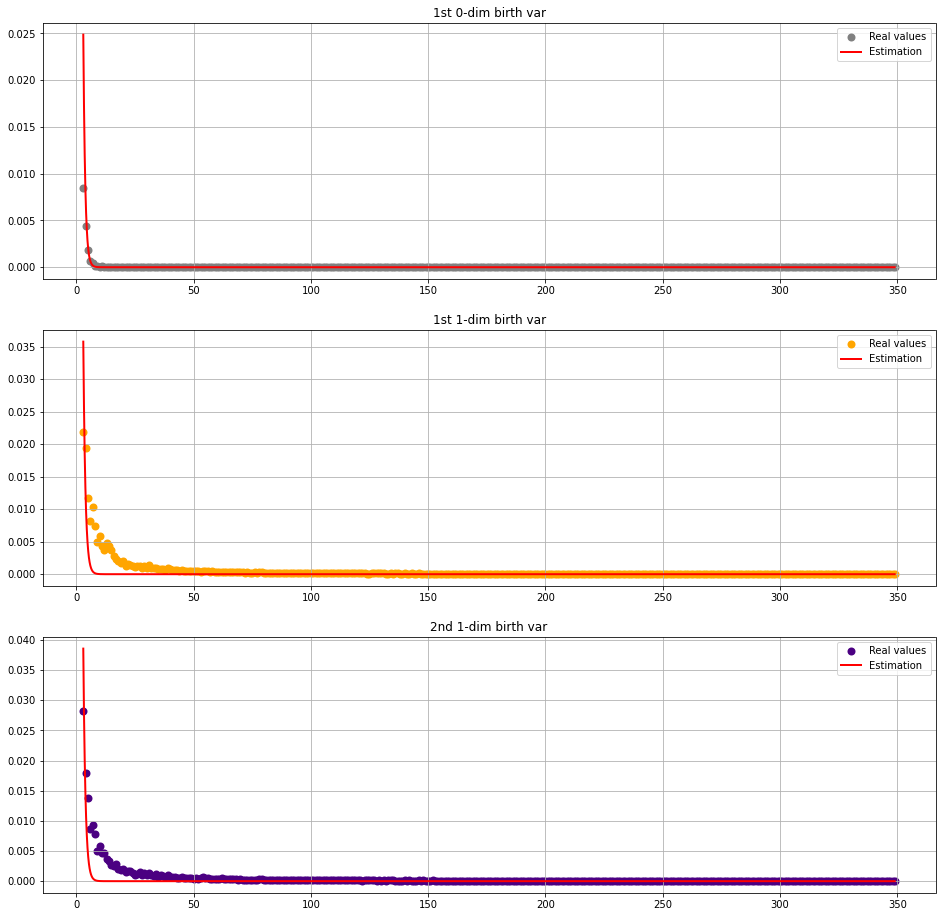

name         a         b           MSE  MSE(n < 40)
0  1st 0-dim birth var  0.933667  1.208523  8.008465e-07     0.000008
1  1st 1-dim birth var  0.965588  1.098459  2.049649e-06     0.000019
2  2nd 1-dim birth var  0.972999  1.076108  1.719844e-06     0.000016

In [8]:
names = ['1st 0-dim birth var', '1st 1-dim birth var', '2nd 1-dim birth var']
colors = ['grey', 'orange', 'indigo']


fig, axs = plt.subplots(3, 1, figsize=(16, 16))

info = []
for i in range(3):
    name = names[i]
    test_n = df['Size'].values
    test_v = df[name]

    res = get_ab0(test_v, test_n)
    a, b = res['a'], res['b']
    info.append({'name' : name})
    info[-1].update(res)
    upper = 40
    info[-1].update({'MSE(n < {0})'.format(upper) : error0(a, b, test_v[test_n < upper], test_n[test_n < upper])})
    
    estimation_x = np.arange(test_n.min(), test_n.max(), 0.1)
    estimation_y = a * np.exp(-b*estimation_x)

    axs[i].set_title(name)
    axs[i].scatter(test_n, test_v, color=colors[i], linewidth=2, label='Real values')
    axs[i].plot(estimation_x, estimation_y, color='red', linewidth=2, label='Estimation', linestyle='-')
    axs[i].grid(True)
    axs[i].legend()
plt.show()
info = pd.DataFrame(info)
info

__Conclusion:__ The assumption looks correct. So let's move!

$$
    f(x) = c \pm ae^{-bx}
$$

So if that's down border: $f(x) = a + e^{-bx}$, and if that's upper: $f(x) = a - e^{-bx}$

The first case:
$$
    E = \sum\limits_{i=1}^n \left(y_i - c - ae^{-bx_i}\right)^2 \to 0
$$

and the second:
$$
    E = \sum\limits_{i=1}^n \left(y_i - c + ae^{-bx_i}\right)^2 \to 0
$$


In [9]:
def error1(a, b, c, x, y):
    return ((y - c - a*np.exp(-b*x))**2).mean()

def error2(a, b, c, x, y):
    return ((y - c + a*np.exp(-b*x))**2).mean()

In [10]:
def get_abc1(x, y, a0=1, b0=1, c0=0):
    err = lambda t: error1(t[0], t[1], t[2], x, y)
    opt = optimize.minimize(err, np.array([a0, b0, c0]))
    return {'a': opt.x[0], 'b': opt.x[1], 'c': opt.x[2], 'MSE': opt.fun}

def get_abc2(x, y, a0=1, b0=1, c0=0):
    err = lambda t: error2(t[0], t[1], t[2], x, y)
    opt = optimize.minimize(err, np.array([a0, b0, c0]))
    return {'a': opt.x[0], 'b': opt.x[1], 'c': opt.x[2], 'MSE': opt.fun}

Case 1:
a : 2.010322827566498
b : 0.10127629419602846
c : 7.0060867915637175
MSE : 0.002191453524298193

Case 2:
a : 1.2599606100716636
b : 0.0972378597896435
c : 6.840881502277426
MSE : 0.024487704741927453


/tmp/ipykernel_132007/2293248036.py:5: RuntimeWarning: overflow encountered in exp
  return ((y - c + a*np.exp(-b*x))**2).mean()
/tmp/ipykernel_132007/2293248036.py:5: RuntimeWarning: overflow encountered in square
  return ((y - c + a*np.exp(-b*x))**2).mean()
/home/fedor/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/tmp/ipykernel_132007/2293248036.py:5: RuntimeWarning: overflow encountered in exp
  return ((y - c + a*np.exp(-b*x))**2).mean()
/tmp/ipykernel_132007/2293248036.py:5: RuntimeWarning: overflow encountered in square
  return ((y - c + a*np.exp(-b*x))**2).mean()


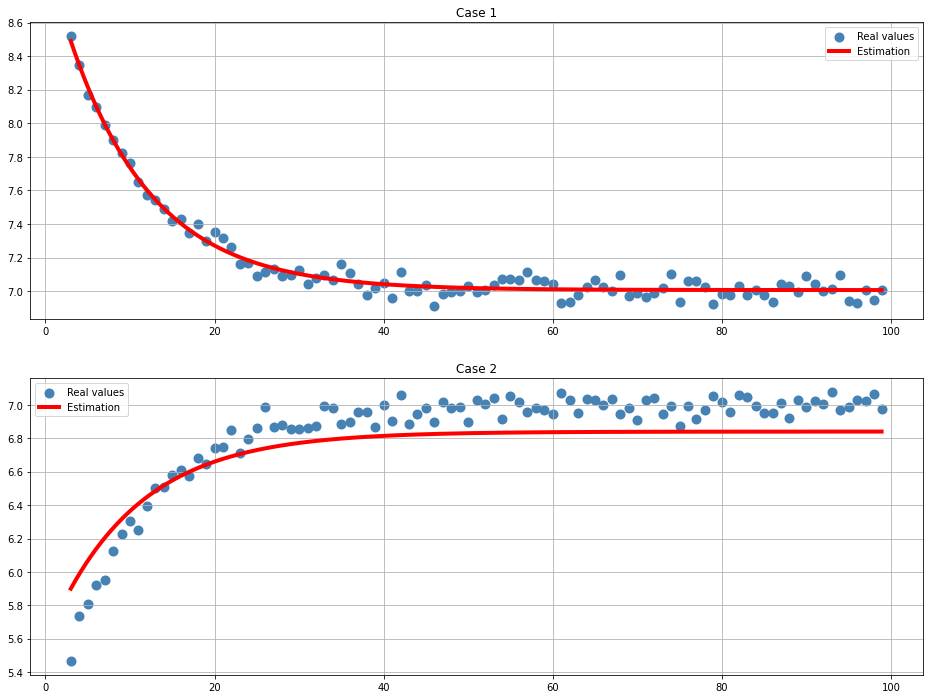

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(16, 12))

# test 1
test_x = np.arange(3, 100)
test_y = 7 + 2 * np.exp(-0.1*test_x) + 0.05*np.random.normal(size=len(test_x))

res = get_abc1(test_x, test_y)
print('Case 1:')
for key in res:
    print(key, ':', res[key])
print()
a, b, c = res['a'], res['b'], res['c']

estimation_x = np.arange(test_x.min(), test_x.max(), 0.1)
estimation_y = c + a * np.exp(-b*estimation_x)

axs[0].set_title('Case 1')
axs[0].scatter(test_x, test_y, color='steelblue', linewidth=4, label='Real values')
axs[0].plot(estimation_x, estimation_y, color='red', linewidth=4, label='Estimation')
axs[0].grid(True)
axs[0].legend()

# test 2
test_x = np.arange(3, 100)
test_y = 7 - 2 * np.exp(-0.1*test_x) + 0.05*np.random.normal(size=len(test_x))

res = get_abc2(test_x, test_y)
print('Case 2:')
for key in res:
    print(key, ':', res[key])
a, b, c = res['a'], res['b'], res['c']

estimation_x = np.arange(test_x.min(), test_x.max(), 0.1)
estimation_y = c - a * np.exp(-b*estimation_x)


axs[1].set_title('Case 2')
axs[1].scatter(test_x, test_y, color='steelblue', linewidth=4, label='Real values')
axs[1].plot(estimation_x, estimation_y, color='red', linewidth=4, label='Estimation')
axs[1].grid(True)
axs[1].legend()

plt.show()

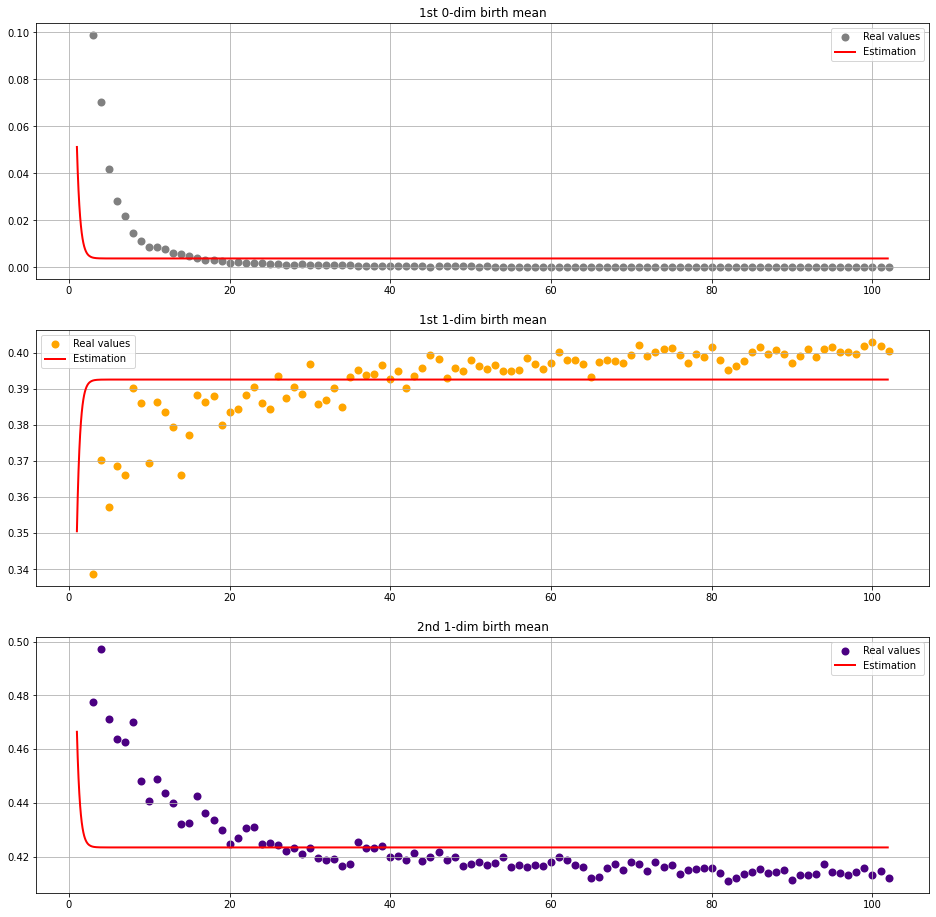

name         a         b         c       MSE  MSE(n < 10)
0  1st 0-dim birth mean  0.553565  2.456901  0.003828  0.000171     0.002302
1  1st 1-dim birth mean  0.529048  2.532719  0.392591  0.000109     0.000856
2  2nd 1-dim birth mean  0.546427  2.542694  0.423527  0.000232     0.002375

In [12]:
names = ['1st 0-dim birth mean', '1st 1-dim birth mean', '2nd 1-dim birth mean']
colors = ['grey', 'orange', 'indigo']
gets = [get_abc2, get_abc1, get_abc2]
errs = [error2, error1, error2]
units = [1, -1, 1]

fig, axs = plt.subplots(3, 1, figsize=(16, 16))

info = []
for i in range(3):
    name = names[i]
    test_x = df['Size'].values[:100]
    test_y = df[name][:100]

    res = gets[i](test_x, test_y)
    info.append({'name' : name})
    info[-1].update(res)
    upper = 10
    a, b, c = res['a'], res['b'], res['c']
    info[-1].update({'MSE(n < {0})'.format(upper) : errs[i](a, b, c, test_x[test_x < upper], test_y[test_x < upper])})
    
    estimation_x = np.arange(1, test_x.max(), 0.1)
    estimation_y = c + units[i]*a*np.exp(-b*estimation_x)

    axs[i].set_title(name)
    axs[i].scatter(test_x, test_y, color=colors[i], linewidth=2, label='Real values')
    axs[i].plot(estimation_x, estimation_y, color='red', linewidth=2, label='Estimation', linestyle='-')
    axs[i].grid(True)
    axs[i].legend()
plt.show()
info = pd.DataFrame(info)
info

So here that model does not look cool...
Let's try another way!